In [1]:
import pandas as pd
import plotly.express as px
import shootout.methods.post_processors as pp
import shootout.methods.plotters as pt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("Results/run-01")

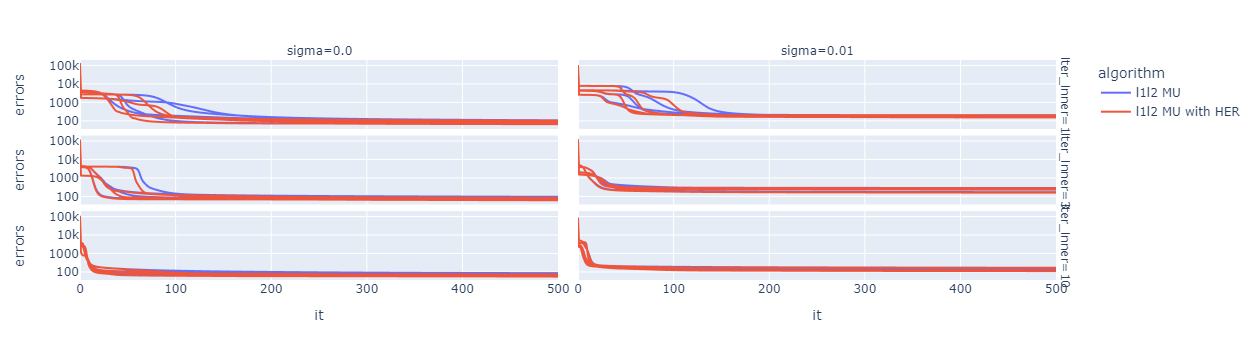

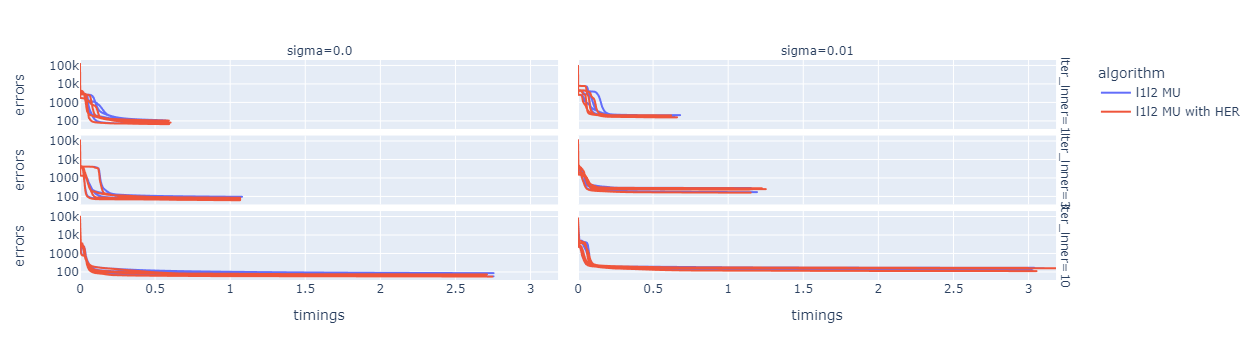

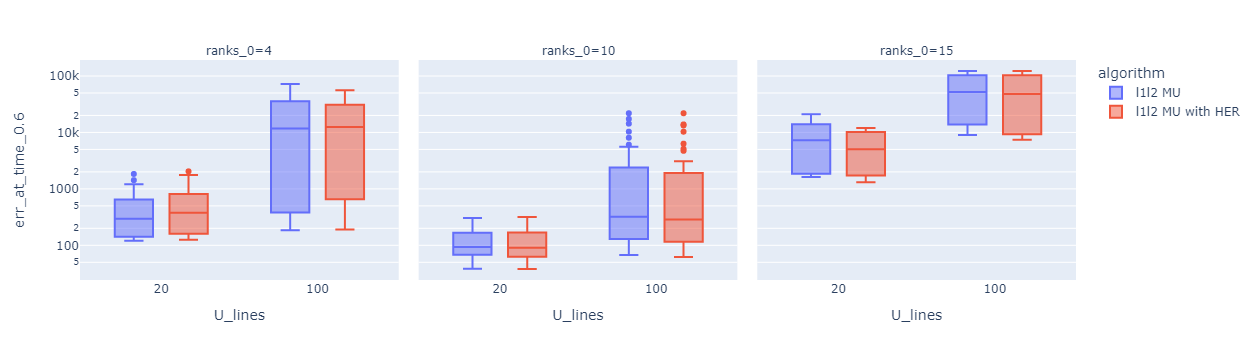

In [3]:
# 1. Convergence Plots

variables={    
    "U_lines" : [20,100],
    "V_lines" : [20,100],
    "ranks_0" : [4,10,15],
    "sigma" : [0,1e-2],
    "iter_inner" : [1,3,10]
        }
df_conv = pp.df_to_convergence_df(df,other_names=list(variables.keys()),groups=True,groups_names=list(variables.keys()), filters={"U_lines":100,"V_lines":20, "ranks_0":10})
# iteration
fig = px.line(df_conv, x="it", y="errors", color="algorithm", log_y=True, line_group="groups", facet_col="sigma", facet_row="iter_inner")
# time
fig2 = px.line(df_conv, x="timings", y="errors", color="algorithm", log_y=True, line_group="groups", facet_col="sigma", facet_row="iter_inner")

# 2. speed comparison plots (I don't know the real name)

thresh = np.logspace(6,0,100)
#scores_time, scores_it,_,_ = pp.find_best_at_all_thresh(df, thresh, 2)
#fig3 = pt.plot_speed_comparison(thresh,scores_time,thresh,scores_it)

# 3. Errors at time or its

df = pp.error_at_time_or_it(df,time_stamps=[0.2,0.6,1],it_stamps=[10,200,500])
fig_box = px.box(df, y="err_at_time_0.6", color="algorithm", x="U_lines", log_y=True, facet_col="ranks_0")
fig_box.update_xaxes(type='category')


# showing all
fig.show()
fig2.show()
fig_box.show()
plt.show()